In [1]:
# 1. Recopilación y carga de datos
import pandas as pd

superstores_sales_file = 'train.csv'

df = pd.read_csv(superstores_sales_file)

print('PRINTING HEAD:')
print(df.head())

print('PRINTING INFO:')
print(df.info())

PRINTING HEAD:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product

In [7]:
print('PRINTING DESCRIBE:')
print(df.describe())

product_freq = df['Product ID'].value_counts()

print('\nProduct Count: \n' , product_freq)

PRINTING DESCRIBE:
            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

Product Count: 
 OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
                   ..
OFF-PA-10000919     1
TEC-MA-10003353     1
OFF-LA-10003388     1
OFF-EN-10004206     1
TEC-PH-10002645     1
Name: Product ID, Length: 1861, dtype: int64


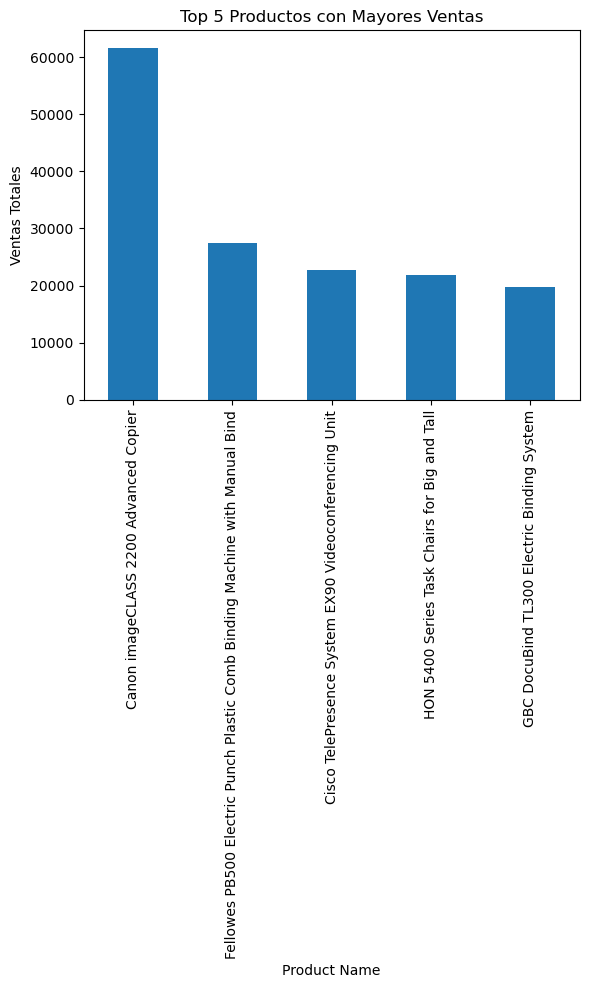

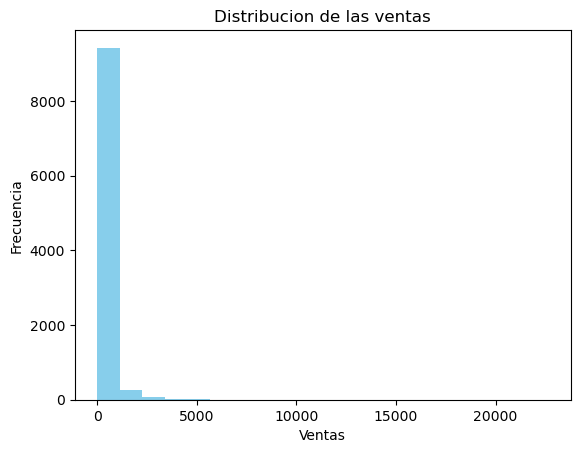

In [11]:
# Graficos de barras y histogramas

import matplotlib.pyplot as plt
import seaborn as sns

top_5_products = df.groupby('Product Name')['Sales'].sum().nlargest(5)

top_5_products.plot(kind='bar', title='Top 5 Productos con Mayores Ventas')

plt.ylabel('Ventas Totales')

plt.show()

plt.hist(df['Sales'], bins=20, color='skyblue')
plt.title('Distribucion de las ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

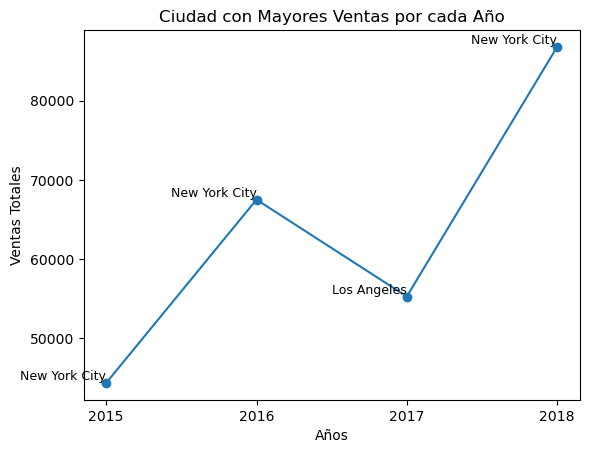

In [30]:
# Identificacion de Patrones

# Asegurar las fechas de Order Date en formato DateTime, para extraer el año para los groupings
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extraer los años
df['Year'] = df['Order Date'].dt.year

# Conseguimos las agregaciones de los valores de ventas 'Sales', tomando como comparativos los campos de año y la ciudad
ventas_anuales = df.groupby(['Year', 'City'])['Sales'].sum().reset_index()

# Encontramos el rango de las ciudades que mas vendieron basado en el campo 'Sales' de cada año
top_ciudades_por_anio = ventas_anuales.loc[ventas_anuales.groupby('Year')['Sales'].idxmax()]

# Sorteo
top_ciudades_por_anio = top_ciudades_por_anio.sort_values(by='Year')

plt.plot(top_ciudades_por_anio['Year'], top_ciudades_por_anio['Sales'], marker='o')

# Añadimos los nombres de las ciudad a cada punto del plot graph
for i in range(len(top_ciudades_por_anio)):
    plt.text(top_ciudades_por_anio['Year'].iloc[i], top_ciudades_por_anio['Sales'].iloc[i],
             top_ciudades_por_anio['City'].iloc[i], fontsize=9, ha='right', va='bottom')

plt.xlabel('Años')
plt.ylabel('Ventas Totales')
plt.title('Ciudad con Mayores Ventas por cada Año')
plt.xticks(top_ciudades_por_anio['Year'])
plt.show()